# DS-GA 1018 Modeling Time Series Data
# Lab 1: ACF, CCF and ARMA

functions and packages needed

In [1]:
# Install statsmodels
# conda install -c conda-forge statsmodels
import statsmodels
from statsmodels.tsa.stattools import acf, ccf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics import utils
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

In [2]:
# statsmodels.graphics.tsaplots doesn't have plotting function for CCF so I have to write my own.
def plot_ccf(x, y, ax=None, lags=None, alpha=.05, use_vlines=True, unbiased=False,
             fft=False, title='Cross-correlation', zero=True, **kwargs):
    fig, ax = utils.create_mpl_ax(ax)
    lags, nlags, irregular = statsmodels.graphics.tsaplots._prepare_data_corr_plot(x, lags, zero)
    confint = None
    ccf_val = ccf(x, y)
    if lags is not None:
        ccf_val = ccf_val[:nlags+1]
    statsmodels.graphics.tsaplots._plot_corr(ax, title, ccf_val, confint, lags, irregular, use_vlines, vlines_kwargs=kwargs)
    # Depending on your version of statsmodels, you may have to use the following instead:
    # statsmodels.graphics.tsaplots._plot_corr(ax, title, ccf_val, confint, lags, irregular, use_vlines, vlines_kwargs=kwargs)
    return fig

## Part I:  Autocorrelation Function

### A) implement ACF
Do your own implementation of the ACF function. Your implementation will be checked against statsmodels.tsa.stattools.acf.

In [3]:
def acf_impl(x, nlags):
    """
    TODO
    @param x: a 1-d numpy array (data)
    @param nlags: an integer indicating how far back to compute the ACF
    @return a 1-d numpy array with (nlags+1) elements. 
            Where the first element denotes the acf at lag = 0 (1.0 by definition).
    """
    #TODO: replace the template code with your code here. This part will be graded.
    x_mean = np.mean(x) # compute the mean of the data sequence
    x_length = x.shape[0] # length of the data sequence
    acf_values = np.zeros(nlags+1)
    for lag in np.arange(nlags+1):
        summation = 0
        for x_lagged, x_i in zip(np.roll(x, lag)[lag:], x[lag:]):
            summation += (x_lagged - x_mean)*(x_i - x_mean)
        acf_values[lag] = summation
        # acf_values[lag] = np.dot((np.roll(x, lag) - x_mean), (x - x_mean))*(1.0/x_length)
    acf_values = acf_values / acf_values[0]
    return acf_values

### B) ACF of White Noise 

$$w_t \sim N(0, \sigma^2)$$

- Set $\sigma$ = 1, sample n = 500 points from the process above
- Plot the white noise
- Plot the sample ACF up to lag = 20.
- Calculate the analytical ACF and compare it with the sample ACF.
- What trend/observation can you find in the ACF plot?
- Change n to 50, compare the new ACF plot (n=50) to the old ACF plot (n=500). What causes the difference?

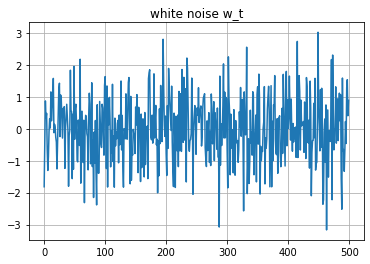

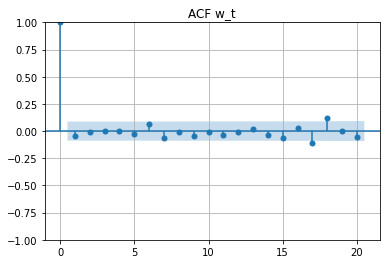

Text(0.5, 1.0, 'Analytical vs Sample ACF')

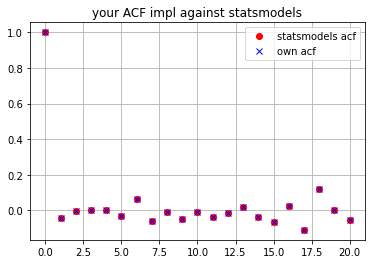

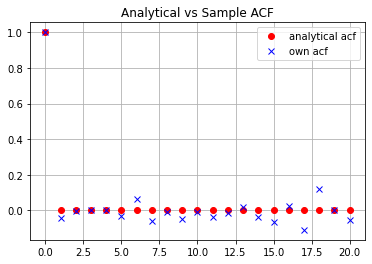

In [4]:
n = 500
mean = 0
std = 1 
lag = 20

# create white noise
w_t = np.random.normal(mean, std, size=n)

# plot white noise
plt.plot(w_t)
plt.title("white noise w_t")
plt.grid()
plt.show()

# calculate acf
acf_val = acf(x=w_t, nlags=lag, fft=True)
plot_acf(x=w_t, lags=lag, title="ACF w_t")
plt.grid()
plt.show()

# your implementation:
acf_val_impl = acf_impl(x=w_t, nlags=lag)
plt.figure()
plt.plot(acf_val, 'or', label='statsmodels acf')
plt.plot(acf_val_impl, 'xb', label='own acf')
plt.legend();
plt.grid()
plt.title('your ACF impl against statsmodels')

# analytical ACF: for White Noise it is the variance for lag=0 otherwise is 0
acf_ana = np.zeros(acf_val_impl.shape[0])
acf_ana[0] = std**2
acf_ana /= acf_ana[0]
plt.figure()
plt.plot(acf_ana, 'or', label='analytical acf')
plt.plot(acf_val_impl, 'xb', label='own acf')
plt.legend();
plt.grid()
plt.title('Analytical vs Sample ACF')

**Comments:** The third figure above compares the computation of the auto-correlation function of a 1-d data sequence when using the ACF from statsmodels and the ACF based on our own implementation. As we can see, our own implementation has a similar trend to the sample ACF. This suggests the "from scratch" implementation should be correct.

First of all we know that White Noise has ACF that has all zeros except when the lag is 0 (given by the analytical result - white noise in uncorrelated in time).
However, the sample ACF has non-zero (low) values for a lag different from 0. This is due to the fact that the sample ACF is estimated from a certain amount of data. Therefore, to further approach the analytical ACF we would need to generate more data. Hence our estimate would be more accurate.

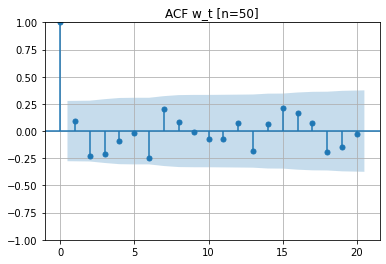

Text(0.5, 1.0, 'own ACF impl: 50 vs 500 points')

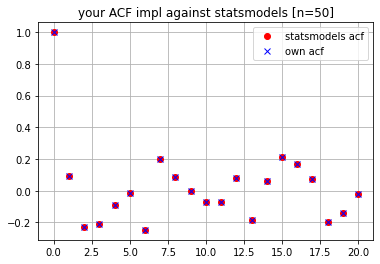

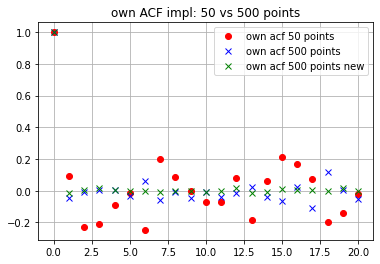

In [5]:
# create white noise
n=50
w_t_50 = np.random.normal(mean, std, size=n)

# calculate acf
acf_val_50 = acf(x=w_t_50, nlags=lag, fft=True)
plot_acf(x=w_t_50, lags=lag, title="ACF w_t [n=50]")
plt.grid()
plt.show()

# your implementation:
acf_val_impl_50 = acf_impl(x=w_t_50, nlags=lag)
plt.figure()
plt.plot(acf_val_50, 'or', label='statsmodels acf')
plt.plot(acf_val_impl_50, 'xb', label='own acf')
plt.legend();
plt.grid()
plt.title('your ACF impl against statsmodels [n=50]')

acf_val_impl_new = acf_impl(x=np.random.normal(mean, std, size=10000), nlags=lag)
# comparison 50 samples vs 500 samples
plt.figure()
plt.plot(acf_val_impl_50, 'or', label='own acf 50 points')
plt.plot(acf_val_impl, 'xb', label='own acf 500 points')
plt.plot(acf_val_impl_new, 'xg', label='own acf 500 points new')
plt.legend();
plt.grid()
plt.title('own ACF impl: 50 vs 500 points')

**Comments:** As we can see from the picture above, when using 50 points to derived the sample ACF, our estimate is less "precise" than the case with 500 points. This difference is due to the generation of different random samples, but mainly to the fact that with less samples our estimate will be worse, given that the estimator for the ACF is biased. As we can see, by generating another set of 10000 samples the new estimate improves and better approximates the analytical ACF.

### C) ACF of Moving Average 

$$v_t = \frac{1}{3}(w_{t}+ w_{t+1}+ w_{t+2})$$

- Sample n+2 white noise from N(0,1)
- Add code to compute the moving average $v_t$.
- Plot both $w_t$ and $v_t$ and compare the two time series.
- Derive the analytical ACF
- Plot the sample/empirical ACF of $v_t$ and compare it with the analytical ACF.

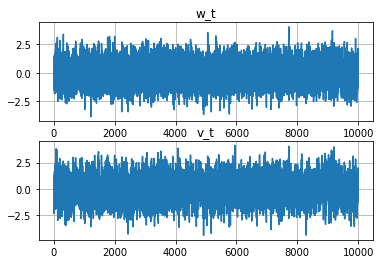

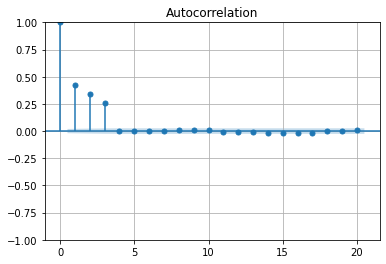

c:\users\tommy\.conda\envs\mlenv\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


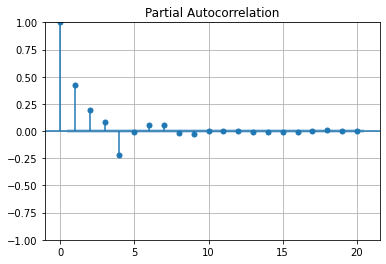

Text(0.5, 1.0, 'your ACF impl against statsmodels')

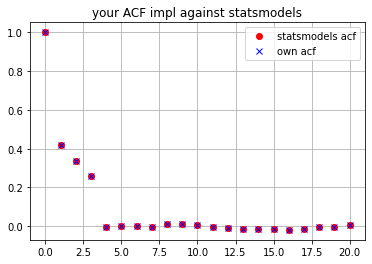

In [17]:
n = 10000
mean = 0
std = 1 
lag = 20

# create white noise
w_t = np.random.normal(mean, std, size=n+3)
v_t = np.zeros((n,))
# create moving average
#TODO: replace the template code with your code here. This part will be graded.
#v_t = np.convolve(w_t, np.ones(3))[2:-2] / 3.0 # convolution with averaging filter

# MA(3)
for i,j in enumerate(range(3, w_t.shape[0])):
    v_t[i] = w_t[j] + (1./3)*(w_t[j-1] + w_t[j-2] + w_t[j-3])
    

# plot white noise
plt.figure(1)
plt.subplot(211)
plt.plot(w_t)
plt.grid()
plt.title("w_t")

# plot moving average
plt.subplot(212)
plt.plot(v_t)
plt.grid()
plt.title("v_t")

# calculate acf
acf_val = acf(x=v_t, nlags=lag, fft=True)
plot_acf(x=v_t, lags=lag)
plt.grid()
plt.show()

plot_pacf(x=v_t, lags=lag)
plt.grid()
plt.show()

# your implementation:
acf_val_impl = acf_impl(x=v_t, nlags=lag)
plt.figure()
plt.plot(acf_val, 'or', label='statsmodels acf')
plt.plot(acf_val_impl, 'xb', label='own acf')
plt.legend()
plt.grid()
plt.title('your ACF impl against statsmodels')

# analytical ACF:
#acf_ana = np.zeros(acf_val_impl.shape[0])
#acf_ana[0] = (1.0/3)*std**2
#acf_ana[1] = (2.0/9)*std**2
#acf_ana[2] = (1.0/9)*std**2
#acf_ana /= acf_ana[0]
#plt.figure()
#plt.plot(acf_ana, 'or', label='analytical acf')
#plt.plot(acf_val_impl, 'xb', label='own acf')
#plt.legend();
#plt.grid()
#plt.title('Analytical vs Sample ACF')

**Comments:** As we can see from the first picture in this block, $v_t$ is clearly an averaged version of $w_t$.

From the analytical vs empirical ACF graph, we can notice that the estimation is good for lag=0,1,2. However, the sample ACF shows some correlation for lag>2 (which should be zero from the analytical result). By increasing the number of samples for estimating the empirical ACF we would get an estimate closed to the analytical ACF for lag>2. 

### D) ACF of signal in noise 

$$v_t = 2 cos(\frac{2\pi t}{50} + 0.6\pi) + w_t$$

- Sample white noise of length n from $N(0,1)$
- Add code to compute $v_t$.
- Plot both $w_t$ and $v_t$. Compare the two plots.
- Plot the sample ACF of $v_t$. What's the pattern? What causes the observed pattern?

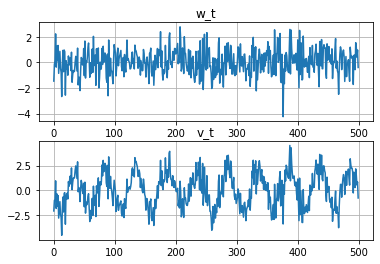

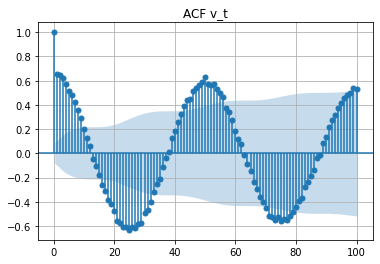

Text(0.5, 1.0, 'your ACF impl against statsmodels')

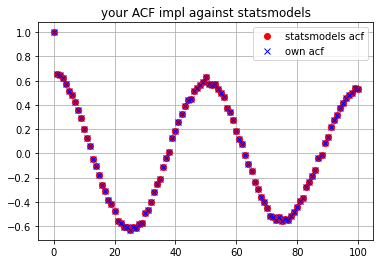

In [20]:
n = 500
mean = 0
std = 1
lag = 100

# create white noise
w_t = np.random.normal(mean, std, size=n)
# create signal w. noise
#TODO: replace the template code with your code here. This part will be graded.
# v_t = np.zeros(len(w_t))
t = np.arange(n)
v_t = 2*np.cos(2*np.pi*t/50 + 0.6*np.pi) + w_t

# plot white noise
plt.figure(1)
plt.subplot(211)
plt.plot(w_t)
plt.grid()
plt.title("w_t")
# plot signal with noise
plt.subplot(212)
plt.plot(v_t)
plt.grid()
plt.title("v_t")

# plot acf
acf_val = acf(x=v_t, nlags=lag, fft=True)
plot_acf(x=v_t, lags=lag, title="ACF v_t")
plt.grid()
plt.show()

# your implementation:
acf_val_impl = acf_impl(x=v_t, nlags=lag)
plt.figure()
plt.plot(acf_val, 'or', label='statsmodels acf')
plt.plot(acf_val_impl, 'xb', label='own acf')
plt.legend()
plt.grid()
plt.title('your ACF impl against statsmodels')

**Comments:** From the first picture in the block above we can clearly see that $v_t$ has the behavior of a cosine function (given by the periodicity). However, we can also clearly see the effect of adding white noise to this signal. Luckily, the noise is low in amplitude (~$N(0,1)$), hence we can still recognize a periodic behavior in the signal contaminated by noise.

The ACF shows a periodic behavior. This is caused by the fact that the auto-correlation function of a period signal (function) is periodic as well. However, we do not have an "exact" periodicity (also in terms of values) since the periodic cosine function is contaminated by noise.

## Part II:  Cross-correlation Function

### A) CCF of signal with noise
#### Synthetic Data

$$x_t \sim N(0, \sigma_x^2) $$

$$ y_t = 2x_{t-5} + w_t$$

$$w_t \sim N(0, \sigma_x^2)$$

- In this example, we created two processes with a lag of 5.
- Plot both samples and verify the lag.
- Plot the empirical ACF for both samples.
- Plot the empirical CCF. What information can you conclude from the CCF plot?

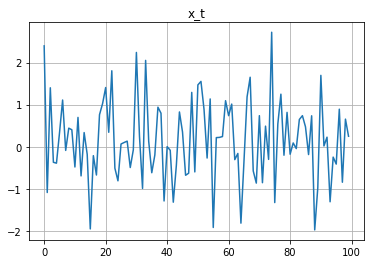

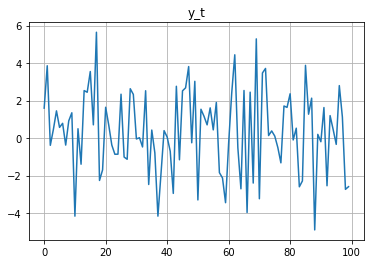

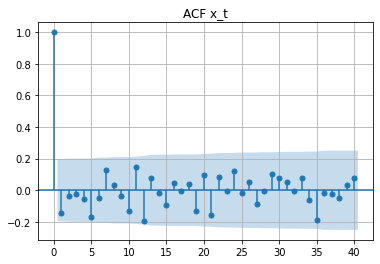

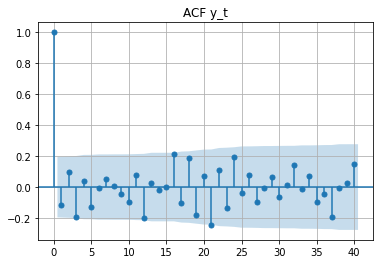

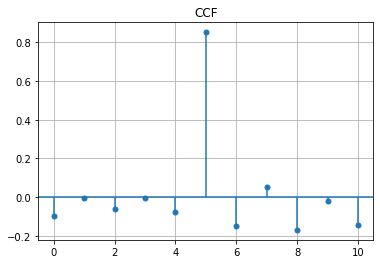

In [21]:
# Cross-correlation synthetic Example
n = 100
mean = 0
std = 1 
lag = 40
true_h = 5

x_t = np.random.normal(mean, std, size=n+5)
#TODO: replace the template code with your code here. This part will be graded.
# y_t = np.zeros(n)
w_t = np.random.normal(mean, std, size=n)
y_t = 2.0*np.roll(x_t, -true_h)[:n] + w_t


# this implementation gives the same result as the one above
'''y_t_v2 = np.zeros(n)
for u, i in enumerate(range(5, n+5)):
    y_t_v2[u] = 2.0 * x_t[i] + w_t[i-5]'''


x_t = x_t[:n]

# plot the original data
plt.plot(x_t)
plt.grid()
plt.title("x_t")
plt.show()
plt.plot(y_t)
# plt.plot(y_t_v2)
plt.grid()
plt.title("y_t")
plt.show()

# plot acf
plot_acf(x=x_t, lags=lag, title="ACF x_t")
plt.grid()
plot_acf(x=y_t, lags=lag, title="ACF y_t")
plt.grid()
plt.show()

# plot ccf
ccf_val = ccf(y_t, x_t)
plot_ccf(x_t, y_t, title="CCF", lags=10)
plt.grid()
plt.show()

**Comments:** From the first two figures above, we can identify some lag for the sequence $y_t$.

From the plot of the cross-correlation function, we can conclude that the two signals $x_t$ and $y_t$ have high correlation for lag=5. This is an expected result since the sequence $y_t$ is a re-scaled, time-shifted version of $x_t$ with time shift equal to 5. The addition of noise makes the cross-correlation not exact. Also, there's little correlation for the other values, as expected.

### B) CCF of data
#### Southern Oscillation Index (SOI) v.s. Recruitment (Rec)

- Replicate the procedure in the previous section.
- What information can you tell from the CCF plot.
- In this example, our procedure is actually flawed. Unlike the previous example, we can not tell if the cross-correlation estimate is significantly different from zero by looking at the CCF. Why is that? What can we do to address this issue?

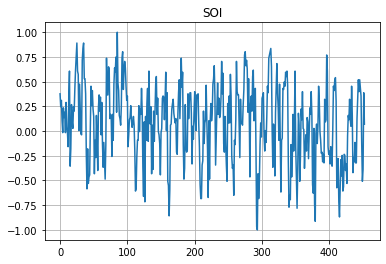

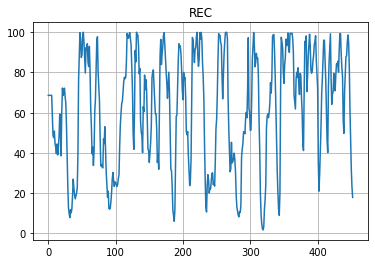

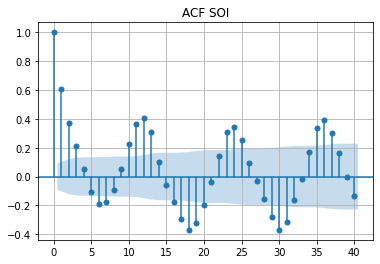

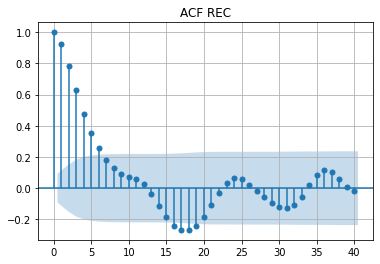

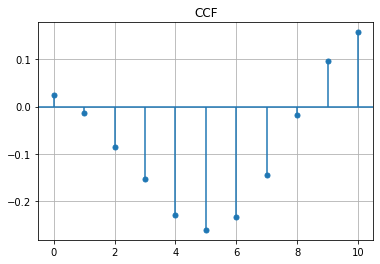

In [24]:
soi = np.array(pd.read_csv("./soi.csv")["x"])
rec = np.array(pd.read_csv("./rec.csv")["x"])
#TODO: This part will be graded.

# plot data
plt.plot(soi)
plt.grid()
plt.title("SOI")
plt.show()
plt.plot(rec)
plt.grid()
plt.title("REC")
plt.show()

# plot acf
plot_acf(x=soi, lags=lag, title="ACF SOI")
plt.grid()
plot_acf(x=rec, lags=lag, title="ACF REC")
plt.grid()
plt.show()

# plot ccf
ccf_val_soi_rec = ccf(soi, rec)
plot_ccf(soi, rec, title="CCF", lags=10)
plt.grid()
plt.show()

**Comments:** In this case, the two sequences show some correlation for lag=5 (we might see these from the behavior of the two signals). However, we cannot tell that the cross-correlation is significantly different from zero. This is due to the fact the the two sequences have different behaviors, as can also be seen from the autocorrelation plots. SOI seems to have some periodic structure, which is not clear in the case of REC, instead. In this case, I think we could try to shift REC and compute the cross-correlation function again to see if there are any significative changes.

## Part III
### Moving Average

$$x_t = 0.5 x_{t-1} - 0.5 w_{t-1} + w_t$$

$$w_t\sim N(0, \sigma^2)$$

Is $x_t$ same as white noise $w_t$?
Think about ACF.

Then use code below to assess and verify your guess.

They should be the same in terms of ACF. (very very similar in the graph below)

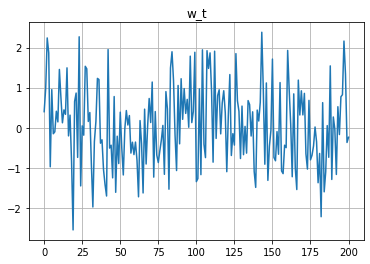

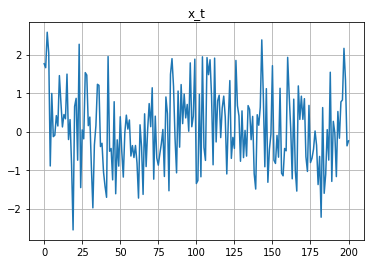

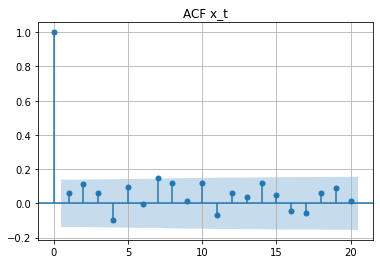

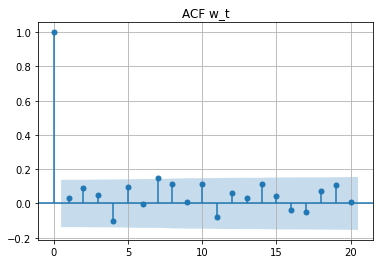

In [27]:
n = 200
mean = 0
std = 1 
lag = 20

# create white noise
np.random.seed(0)
x_t = list(np.random.normal(mean, std, size=1))
w_t = np.random.normal(mean, std, size=n+1) 
for i in range(1, n+1):
    x_t.append(0.5 * x_t[i-1] - 0.5 * w_t[i-1] + w_t[i] )

# plot x_t & w_t
plt.plot(w_t)
plt.title("w_t")
plt.grid()
plt.show()
plt.plot(x_t)
plt.title("x_t")
plt.grid()
plt.show()

# acf 
plot_acf(x=x_t, lags=lag, title="ACF x_t")
plt.grid()
plot_acf(x=w_t, lags=lag, title="ACF w_t")
plt.grid()
plt.show()

$$x_t = w_t + \frac{1}{5} w_{t-1}, w_t \sim N(0, 25)$$

$$y_t = v_t + 5 v_{t-1}, v_t \sim N(0,1)$$

Are $x_t$ and $y_t$ the same? Think about ACF.

Then use code below to assess and verify your guess.

They should be the same, in terms of ACF. Since basically $x_t$ is ~$N(0,25)$ + ~$N(0,1)$ and $y_t$ is ~$N(0,1)$ + ~$N(0,25)$. 

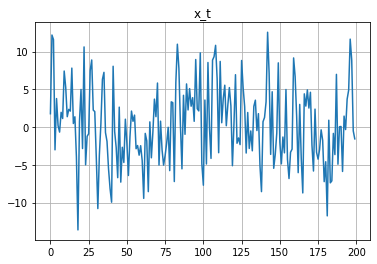

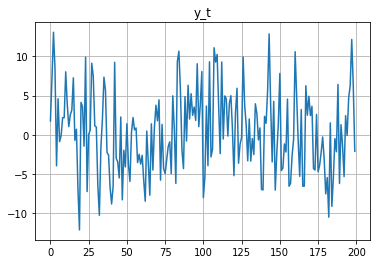

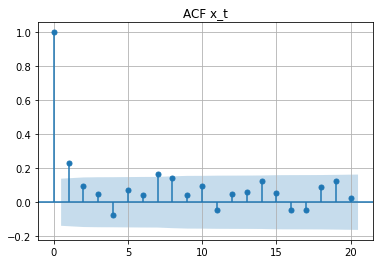

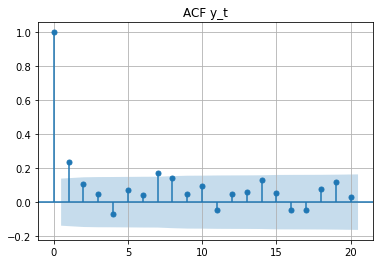

In [26]:
n = 200
mean = 0
lag = 20

# create white noise
np.random.seed(0)
x_t = list(np.random.normal(mean, std, size=1))
w_t = np.random.normal(mean, 5, size=n+1) 
np.random.seed(0)
y_t = list(np.random.normal(mean, std, size=1))
v_t = np.random.normal(mean, 1, size=n+2) 
for i in range(2, n+1):
    x_t.append(w_t[i] + 0.2 * w_t[i-1])
    y_t.append(v_t[i] + 5 * v_t[i-1])

# plot x_t & y_t
plt.plot(x_t)
plt.title("x_t")
plt.grid()
plt.show()
plt.plot(y_t)
plt.title("y_t")
plt.grid()
plt.show()

# acf
plot_acf(x=x_t, lags=lag, title="ACF x_t")
plt.grid()
plot_acf(x=y_t, lags=lag, title="ACF y_t")
plt.grid()
plt.show()

### Please turn in the code before 09/28/2021 11:59 pm. 

### Your work will be evaluated based on the code and plots. You don't need to write down your answers to these questions in the text blocks. Everything that will be graded is indicated by the "TODO".